In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#import marketing campaign dataset
df = pd.read_csv("C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8550_Data Preparation Methods\\Week 8\\marketing_campaign_adj.csv")
df.pop('Response') #remove 'Response' variable
df.dtypes

Education              object
Marital_Status         object
Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Year_Old                int64
Year_Customer           int64
dtype: object

In [3]:
#Encode values for Education and Marital_Status
df["Education"].replace({"Graduation" : "0", "PhD" : "1", "Master" : "2", "Basic" : "3", "2n Cycle" : "4"}, 
                       inplace=True)
df["Marital_Status"].replace({"Single":"0", "Alone":"0", "Together":"1", "Married":"1", "Divorced":"2", 
                             "Widow":"3", "Absurd":"4", "YOLO":"4"}, inplace=True)

In [4]:
#change data type for Education and Marital_Status as 'int64'

df.Education = df.Education.astype('int64')
df.Marital_Status = df.Marital_Status.astype('int64')

df.dtypes

Education              int64
Marital_Status         int64
Income                 int64
Kidhome                int64
Teenhome               int64
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
AcceptedCmp3           int64
AcceptedCmp4           int64
AcceptedCmp5           int64
AcceptedCmp1           int64
AcceptedCmp2           int64
Complain               int64
Year_Old               int64
Year_Customer          int64
dtype: object

In [5]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
#Explained variation per principal component: [9.99817646e-01 1.27809020e-04]
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
#Cumulative variance explained by 2 principal components: 99.99%
df_scale = pca_2_result

Explained variation per principal component: [9.99817646e-01 1.27809020e-04]
Cumulative variance explained by 2 principal components: 99.99%


In [6]:
df_scale = pd.DataFrame(df_scale)

In [7]:
#add column names
df_scale.columns = ["var1", "var2"]
print(df_scale)

              var1        var2
0      6454.880144 -398.947097
1     -5346.327528  287.930387
2     19925.505677   73.354431
3    -25043.429178  107.598472
4      6604.037935  198.252509
...            ...         ...
2235   9538.464796 -312.156278
2236  12326.018865   68.697099
2237   5298.087322 -531.946253
2238  17558.031103   20.550379
2239   1179.233450  257.542161

[2240 rows x 2 columns]


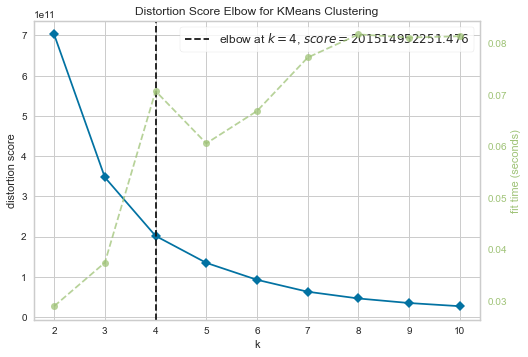

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, K=(1,5)).fit(df_scale)
visualizer.show()
#Results show optimal cluster is 4

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_scale)


In [10]:
#labels_ : gives predicted class labels (cluster) for each data point
kmeans.labels_  # same as kmeans.predict(df)

array([0, 0, 3, ..., 0, 3, 0])

In [11]:
#inertia_ : gives within-cluster sum of squares. 
#This is a total of the within-cluster sum of squares for all clusters.
kmeans.inertia_

201510441317.40576

In [12]:
#n_iter_ : number of iterations that k-means algorithm runs to get 
#a minimum within-cluster sum of squares
kmeans.n_iter_

4

In [13]:
#cluster_centers_ : Location of the centroids on each cluster. 
kmeans.cluster_centers_

array([[ 7.04304117e+01,  5.04652359e+01],
       [-2.47367563e+04,  8.41604295e+01],
       [ 6.14949895e+05,  5.79345526e+03],
       [ 2.50856720e+04, -1.55195345e+02]])

In [14]:
#Get each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 805, 3: 698, 1: 736, 2: 1})

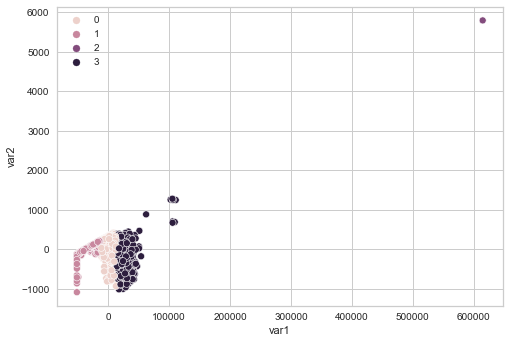

In [15]:
#Visualization of K-means Clustering
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_scale, x="var1", y="var2", hue=kmeans.labels_)
plt.show()